## INTRODUCTION

The objective of this assignment is to develop a gender identification algorithm that uses a set of names categorized by their respective genders as input. The goal is to train the algorithm to classify each name into one of two possible categories: 1) Male, 2) Female.

To achieve this, we will use Python libraries like Pandas to extract the data from datasets, perform feature extraction, and carry out model training to build an accurate algorithm.

Throughout the process, we will address several key issues, including the following:

    1)Merging both initial datasets to create a unified dataset for further analysis.

    2)Identifying and utilizing different features to facilitate the identification of gender based on names, and explaining how this feature engineering will be conducted.

    3)Developing a model that predicts the gender labels of each example and testing it to evaluate its performance.
    
This brief introduction will guide you through the process as we explain each step involved in creating and training the algorithm.

First step is to import the libraries "pandas and "sklearn" , that we will call as "pd" and "sl" respectively

In [467]:
import pandas as pd 
import sklearn as sl

Now we have to load both spreadsheets that are given as a .csv into 2 variables 
    - Males -> Contain the males name spreadsheet 
    -Females -> Contain the females name spreadsheet 

In [468]:
# Load male Spanish names dataset
male = pd.read_csv('male_spanish_names_reduced.csv')

# Load female Spanish names dataset
female = pd.read_csv('female_spanish_names_reduced.csv')


## DATA COLLECTION 

After analyzing these two large datasets we can proceed to create a new column named "Gender" that will display a 1 if the name is a male and a 0 if is a female 

In [469]:
#Assign gender label '1' to all entries in the male dataset
male['Gender'] = '1'

# Assign gender label '0' to all entries in the female dataset
female['Gender'] = '0'

# Display the both datasets
print(male)
print(female)


                  Name Gender
0               ENAITZ      1
1         HILARIO JOSE      1
2       PABLO SANTIAGO      1
3                 EKHI      1
4              ARMANDO      1
...                ...    ...
3495  GERMAN FRANCISCO      1
3496           GREGORI      1
3497             NOLAN      1
3498     MOHAMED SALEM      1
3499      MANUEL ANGEL      1

[3500 rows x 2 columns]
                Name Gender
0             BERTHA      0
1              TESSA      0
2      MONICA TERESA      0
3     MARIA JERONIMA      0
4         MIREN JOSU      0
...              ...    ...
3495           OMARA      0
3496          ELADIA      0
3497        ANA JOSE      0
3498      MARIA ELSA      0
3499  MARIA AGUSTINA      0

[3500 rows x 2 columns]


## METHODOLOGY

1.Concatenation 

We concatenate both matrix in one "total" matrix that will contain all names .
We will use this matrix to start working in the algorithm 

In [470]:
# Combine male and female DataFrames
total = pd.concat([male, female], ignore_index=True)
##total=pd.read_csv('test_dataset.csv')
print(total)


                Name Gender
0             ENAITZ      1
1       HILARIO JOSE      1
2     PABLO SANTIAGO      1
3               EKHI      1
4            ARMANDO      1
...              ...    ...
6995           OMARA      0
6996          ELADIA      0
6997        ANA JOSE      0
6998      MARIA ELSA      0
6999  MARIA AGUSTINA      0

[7000 rows x 2 columns]



2. We must think of potential features that may help us to teach how to perform the task to the algorithm 
    This will hep to the unsertanding of the algorithm later in simulation

We have seen that some names are compound and we have to create a function that help us indentify whether or not a name is.

We proceed to create the function :

In [471]:
# Define a function to detect compound names
def compound_detector(Name):
    words = Name.split()
    return len(words) > 1



Compound name 


Right after we use this function to create a column in the total matrix that show us whether or not the name is a compound name 

In [472]:
# Create 'Compound name' column indicating if name is compound
total['Compound name'] = total['Name'].apply(compound_detector)
total['Compound name'] = total['Compound name'].astype(int)
print(total)

                Name Gender  Compound name
0             ENAITZ      1              0
1       HILARIO JOSE      1              1
2     PABLO SANTIAGO      1              1
3               EKHI      1              0
4            ARMANDO      1              0
...              ...    ...            ...
6995           OMARA      0              0
6996          ELADIA      0              0
6997        ANA JOSE      0              1
6998      MARIA ELSA      0              1
6999  MARIA AGUSTINA      0              1

[7000 rows x 3 columns]


As  have decided to add a "Compound Names" column we have to take into account that in these cases, the first name is the most important for us, as it provides clues about the gender.

For example:

"Maria Jose" (female name + male name) acts as a female name because "Maria" is female.
"Jose Maria" (male name + female name) acts as a male name because "Jose" is male.
We categorized the second name as irrelevant, so we decided to remove it.

In [473]:
# Extract the first name from the 'Name' column
total['First Name'] = total['Name'].str.split().str[0]
print(total)

                Name Gender  Compound name First Name
0             ENAITZ      1              0     ENAITZ
1       HILARIO JOSE      1              1    HILARIO
2     PABLO SANTIAGO      1              1      PABLO
3               EKHI      1              0       EKHI
4            ARMANDO      1              0    ARMANDO
...              ...    ...            ...        ...
6995           OMARA      0              0      OMARA
6996          ELADIA      0              0     ELADIA
6997        ANA JOSE      0              1        ANA
6998      MARIA ELSA      0              1      MARIA
6999  MARIA AGUSTINA      0              1      MARIA

[7000 rows x 4 columns]


For the all names we create two new features representing the first and last letter of each name. Each char is translated into its ASCII code correspondant. This will permit the algorithm to work with numbers. 
The feature will be crucial for the model.

In [474]:
# Get ASCII code of first letter in 'First Name'
total['First letter'] = total['First Name'].str[0].apply(lambda x: ord(x))

# Get ASCII code of last letter in 'First Name'
total['Last letter'] = total['First Name'].str[-1].apply(lambda x: ord(x))

display(total)

,Name,Gender,Compound name,First Name,First letter,Last letter
0,ENAITZ,1,0,ENAITZ,69,90
1,HILARIO JOSE,1,1,HILARIO,72,79
2,PABLO SANTIAGO,1,1,PABLO,80,79
3,EKHI,1,0,EKHI,69,73
4,ARMANDO,1,0,ARMANDO,65,79
...,...,...,...,...,...,...
6995,OMARA,0,0,OMARA,79,65
6996,ELADIA,0,0,ELADIA,69,65
6997,ANA JOSE,0,1,ANA,65,65
6998,MARIA ELSA,0,1,MARIA,77,65


We have detected that normally the female's names are usually longer than the males so we will add a column that records the lenghts of each name.

In [475]:
# Calculate length of 'First Name'
total['Length'] = total['First Name'].apply(len)
display(total)

,Name,Gender,Compound name,First Name,First letter,Last letter,Length
0,ENAITZ,1,0,ENAITZ,69,90,6
1,HILARIO JOSE,1,1,HILARIO,72,79,7
2,PABLO SANTIAGO,1,1,PABLO,80,79,5
3,EKHI,1,0,EKHI,69,73,4
4,ARMANDO,1,0,ARMANDO,65,79,7
...,...,...,...,...,...,...,...
6995,OMARA,0,0,OMARA,79,65,5
6996,ELADIA,0,0,ELADIA,69,65,6
6997,ANA JOSE,0,1,ANA,65,65,3
6998,MARIA ELSA,0,1,MARIA,77,65,5


## RESULTS

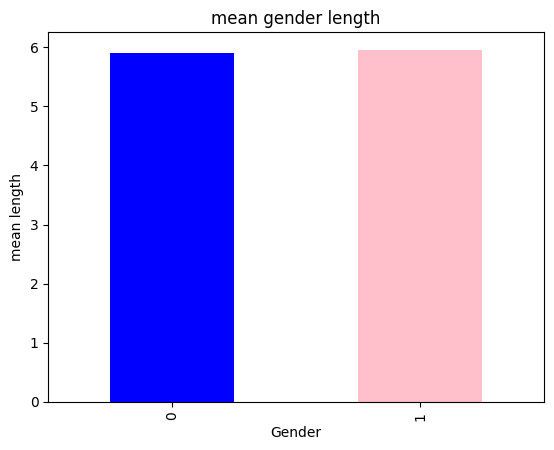

In [476]:

import matplotlib.pyplot as plt
df = pd.DataFrame(total)

# Calculate mean length of names by gender
longitud_media_por_sexo = df.groupby('Gender')['Length'].mean()

# Plot the mean lengths as a bar chart
longitud_media_por_sexo.plot(kind='bar', color=['blue', 'pink'], legend=False)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('mean length')
plt.title('mean gender length')

plt.show()

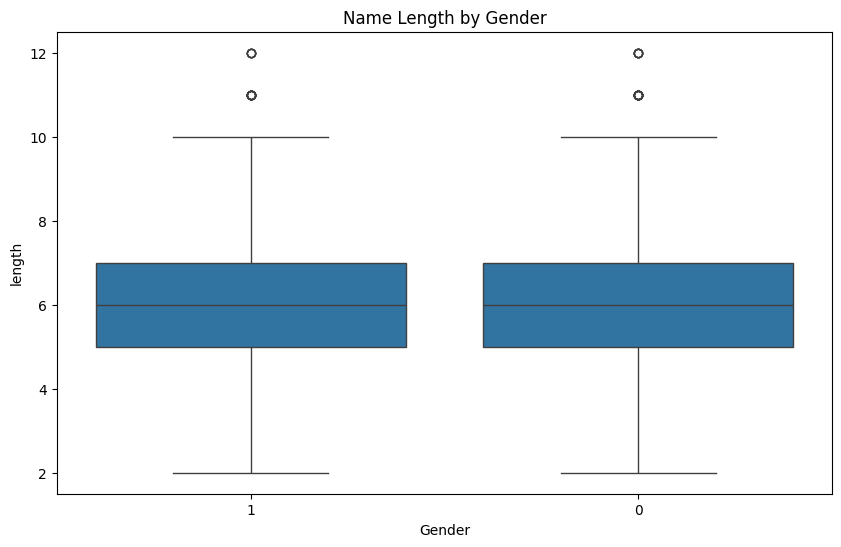

In [477]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(total)

# Plot boxplot of name lengths by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Length', data=df)
plt.title('Name Length by Gender')
plt.xlabel('Gender')
plt.ylabel('length')
plt.show()

Also the suffixes are important at the time to classify unknown names to try to guess their sexs

In [478]:
#Extract the two last letters
total['Suffix_1']=total['First Name'].str[-2:]
display(total)

,Name,Gender,Compound name,First Name,First letter,Last letter,Length,Suffix_1
0,ENAITZ,1,0,ENAITZ,69,90,6,TZ
1,HILARIO JOSE,1,1,HILARIO,72,79,7,IO
2,PABLO SANTIAGO,1,1,PABLO,80,79,5,LO
3,EKHI,1,0,EKHI,69,73,4,HI
4,ARMANDO,1,0,ARMANDO,65,79,7,DO
...,...,...,...,...,...,...,...,...
6995,OMARA,0,0,OMARA,79,65,5,RA
6996,ELADIA,0,0,ELADIA,69,65,6,IA
6997,ANA JOSE,0,1,ANA,65,65,3,NA
6998,MARIA ELSA,0,1,MARIA,77,65,5,IA


We convert it to ASCII code 

In [479]:
total['Suffix_numbers'] = total['First Name'].str[-2].apply(lambda x: ord(x))
display(total)

,Name,Gender,Compound name,First Name,First letter,Last letter,Length,Suffix_1,Suffix_numbers
0,ENAITZ,1,0,ENAITZ,69,90,6,TZ,84
1,HILARIO JOSE,1,1,HILARIO,72,79,7,IO,73
2,PABLO SANTIAGO,1,1,PABLO,80,79,5,LO,76
3,EKHI,1,0,EKHI,69,73,4,HI,72
4,ARMANDO,1,0,ARMANDO,65,79,7,DO,68
...,...,...,...,...,...,...,...,...,...
6995,OMARA,0,0,OMARA,79,65,5,RA,82
6996,ELADIA,0,0,ELADIA,69,65,6,IA,73
6997,ANA JOSE,0,1,ANA,65,65,3,NA,78
6998,MARIA ELSA,0,1,MARIA,77,65,5,IA,73


ONE-HOT ENCODING

We tried to use one-hot encoding but the table became very chaotic. Hence, we simply concatenated the ASCII code of the two last letters, in order to have a specific number for each suffix.

In [480]:
total['Suffix_numbers_str'] = total['Suffix_numbers'].astype(str)
total['Last_letter_str'] = total['Last letter'].astype(str)

# Concatenate the strings
total['Suffix_numbers2'] = total['Suffix_numbers_str'] + total['Last_letter_str']

#Convert the concatenated string back to an integer
total['Suffix_numbers2'] = total['Suffix_numbers2'].astype(int)
display(total)

,Name,Gender,Compound name,First Name,First letter,Last letter,Length,Suffix_1,Suffix_numbers,Suffix_numbers_str,Last_letter_str,Suffix_numbers2
0,ENAITZ,1,0,ENAITZ,69,90,6,TZ,84,84,90,8490
1,HILARIO JOSE,1,1,HILARIO,72,79,7,IO,73,73,79,7379
2,PABLO SANTIAGO,1,1,PABLO,80,79,5,LO,76,76,79,7679
3,EKHI,1,0,EKHI,69,73,4,HI,72,72,73,7273
4,ARMANDO,1,0,ARMANDO,65,79,7,DO,68,68,79,6879
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,OMARA,0,0,OMARA,79,65,5,RA,82,82,65,8265
6996,ELADIA,0,0,ELADIA,69,65,6,IA,73,73,65,7365
6997,ANA JOSE,0,1,ANA,65,65,3,NA,78,78,65,7865
6998,MARIA ELSA,0,1,MARIA,77,65,5,IA,73,73,65,7365


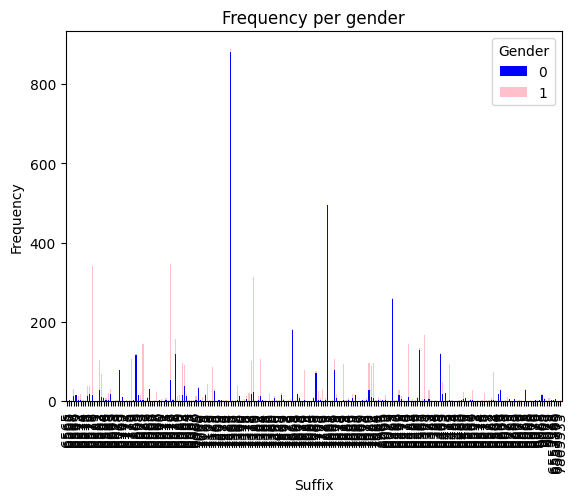

In [481]:


# Count the frequency of the sufixes for each gender
frecuencia_sufijos_sexo = total.groupby(['Suffix_numbers2', 'Gender']).size().unstack(fill_value=0)

frecuencia_sufijos_sexo.plot(kind='bar', stacked=True, color=['blue', 'pink'])
plt.xlabel('Suffix')
plt.ylabel('Frequency')
plt.title('Frequency per gender')
plt.show()



The creation of a feature that counts the number or vowels thta a certain name contains 

We create a function that counts the number of vowerls of each name and then we use it to create a new Feature

In [482]:
def count_vowels(name):
    # Ensure the name is a string and convert it to lowercase
    name = str(name).lower()
    # Define the set of vowels (including accented vowels)
    vowels = set('aeiou')
    # Count the number of vowels in the name
    return sum(1 for char in name if char in vowels)

# Apply the function to the 'First_Name' column
total['Vowel_Count'] = total['First Name'].apply(count_vowels)

# Display the DataFrame with the new 'Vowel_Count' column
display(total)


,Name,Gender,Compound name,First Name,First letter,Last letter,Length,Suffix_1,Suffix_numbers,Suffix_numbers_str,Last_letter_str,Suffix_numbers2,Vowel_Count
0,ENAITZ,1,0,ENAITZ,69,90,6,TZ,84,84,90,8490,3
1,HILARIO JOSE,1,1,HILARIO,72,79,7,IO,73,73,79,7379,4
2,PABLO SANTIAGO,1,1,PABLO,80,79,5,LO,76,76,79,7679,2
3,EKHI,1,0,EKHI,69,73,4,HI,72,72,73,7273,2
4,ARMANDO,1,0,ARMANDO,65,79,7,DO,68,68,79,6879,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,OMARA,0,0,OMARA,79,65,5,RA,82,82,65,8265,3
6996,ELADIA,0,0,ELADIA,69,65,6,IA,73,73,65,7365,4
6997,ANA JOSE,0,1,ANA,65,65,3,NA,78,78,65,7865,2
6998,MARIA ELSA,0,1,MARIA,77,65,5,IA,73,73,65,7365,3


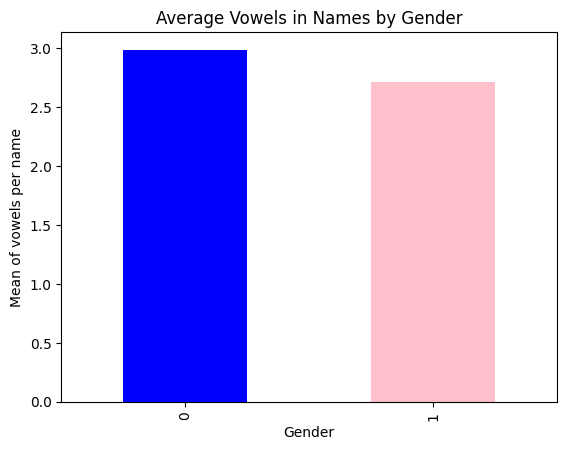

In [483]:
# Calculate average number of vowels in names by gender
promedio_vocales_por_sexo = total.groupby('Gender')['Vowel_Count'].mean()

# Plot the averages as a bar chart
promedio_vocales_por_sexo.plot(kind='bar', color=['blue', 'pink'], legend=False)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Mean of vowels per name')
plt.title('Average Vowels in Names by Gender')

plt.show()

We add another feature that countshow mani As are in each name beacuse we thought that females name has normally more As than the males ones 

In [484]:
# Count occurrences of 'A' in 'First Name' and store in 'A_count'
total['A_count'] = total['First Name'].str.upper().str.count('A')
display(total)

,Name,Gender,Compound name,First Name,First letter,Last letter,Length,Suffix_1,Suffix_numbers,Suffix_numbers_str,Last_letter_str,Suffix_numbers2,Vowel_Count,A_count
0,ENAITZ,1,0,ENAITZ,69,90,6,TZ,84,84,90,8490,3,1
1,HILARIO JOSE,1,1,HILARIO,72,79,7,IO,73,73,79,7379,4,1
2,PABLO SANTIAGO,1,1,PABLO,80,79,5,LO,76,76,79,7679,2,1
3,EKHI,1,0,EKHI,69,73,4,HI,72,72,73,7273,2,0
4,ARMANDO,1,0,ARMANDO,65,79,7,DO,68,68,79,6879,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,OMARA,0,0,OMARA,79,65,5,RA,82,82,65,8265,3,2
6996,ELADIA,0,0,ELADIA,69,65,6,IA,73,73,65,7365,4,2
6997,ANA JOSE,0,1,ANA,65,65,3,NA,78,78,65,7865,2,2
6998,MARIA ELSA,0,1,MARIA,77,65,5,IA,73,73,65,7365,3,2


Here is the demostration of our thoughts

/var/folders/dt/4pnmg31x0ds37k2r7_q5fmpr0000gp/T/ipykernel_4733/1931992916.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='A_count', data=df, estimator=sum, ci=None)


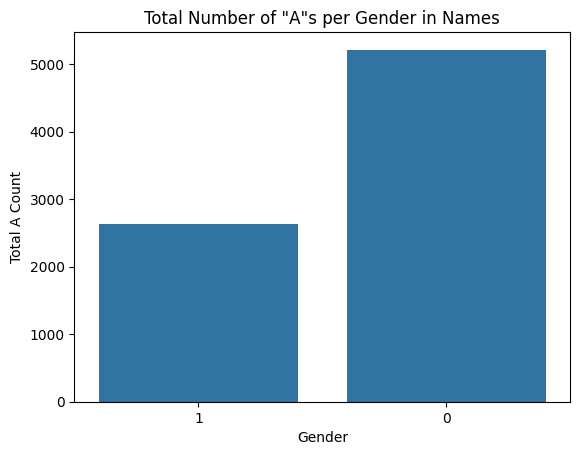

In [485]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(total)

# Plot total number of "A"s per gender
sns.barplot(x='Gender', y='A_count', data=df, estimator=sum, ci=None)

plt.title('Total Number of "A"s per Gender in Names')
plt.xlabel('Gender')
plt.ylabel('Total A Count')
plt.show()

We have done the average to be more representative

/var/folders/dt/4pnmg31x0ds37k2r7_q5fmpr0000gp/T/ipykernel_4733/3000629824.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='A_count', data=df, estimator=lambda x: x.mean(), ci=None)


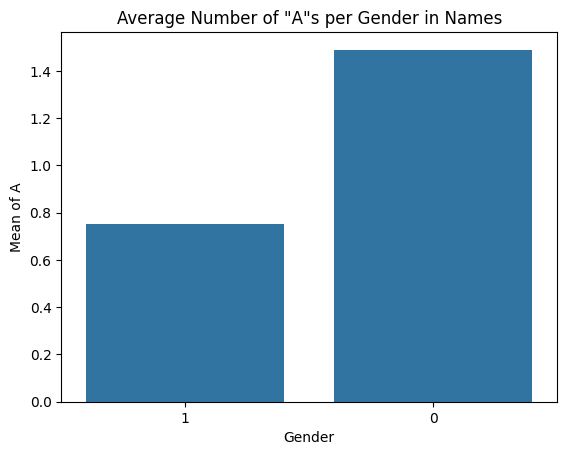

In [486]:
# Graph of the average A for each gender
sns.barplot(x='Gender', y='A_count', data=df, estimator=lambda x: x.mean(), ci=None)

plt.title('Average Number of "A"s per Gender in Names')
plt.xlabel('Gender')
plt.ylabel('Mean of A')
plt.show()

Many females name has only two As so i have treid to make this a feature and see if its funtional to our model 

In [487]:


# Create a column that counts the occurrences of 'A' or 'a' in each name
total['A_count'] = total['First Name'].str.upper().str.count('A')

# Create a new column that indicates if the name has exactly two "A"s
total['Has_two_As'] = total['A_count'] == 2

display(total)

,Name,Gender,Compound name,First Name,First letter,Last letter,Length,Suffix_1,Suffix_numbers,Suffix_numbers_str,Last_letter_str,Suffix_numbers2,Vowel_Count,A_count,Has_two_As
0,ENAITZ,1,0,ENAITZ,69,90,6,TZ,84,84,90,8490,3,1,False
1,HILARIO JOSE,1,1,HILARIO,72,79,7,IO,73,73,79,7379,4,1,False
2,PABLO SANTIAGO,1,1,PABLO,80,79,5,LO,76,76,79,7679,2,1,False
3,EKHI,1,0,EKHI,69,73,4,HI,72,72,73,7273,2,0,False
4,ARMANDO,1,0,ARMANDO,65,79,7,DO,68,68,79,6879,3,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,OMARA,0,0,OMARA,79,65,5,RA,82,82,65,8265,3,2,True
6996,ELADIA,0,0,ELADIA,69,65,6,IA,73,73,65,7365,4,2,True
6997,ANA JOSE,0,1,ANA,65,65,3,NA,78,78,65,7865,2,2,True
6998,MARIA ELSA,0,1,MARIA,77,65,5,IA,73,73,65,7365,3,2,True


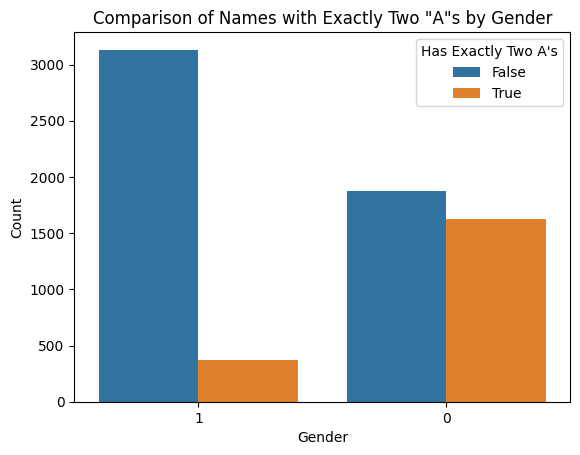

In [488]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(total)

# Create a bar plot to compare the number of names with exactly two "A"s by gender
sns.countplot(x='Gender', hue='Has_two_As', data=df)

# Adding title and labels in English
plt.title('Comparison of Names with Exactly Two "A"s by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.legend(title='Has Exactly Two A\'s', loc='upper right')
plt.show()

We drop the columns that are not important for the simulation 

In [489]:
display(total)
# Drop specified columns from 'total'
columns_to_drop = ['Suffix_numbers', 'Suffix_numbers_str', 'Last_letter_str', 'Name', 'Compound name', 'First Name']
total = total.drop(columns=columns_to_drop, axis=1)
total = total.drop(['Suffix_1'], axis=1)
display(total)

,Name,Gender,Compound name,First Name,First letter,Last letter,Length,Suffix_1,Suffix_numbers,Suffix_numbers_str,Last_letter_str,Suffix_numbers2,Vowel_Count,A_count,Has_two_As
0,ENAITZ,1,0,ENAITZ,69,90,6,TZ,84,84,90,8490,3,1,False
1,HILARIO JOSE,1,1,HILARIO,72,79,7,IO,73,73,79,7379,4,1,False
2,PABLO SANTIAGO,1,1,PABLO,80,79,5,LO,76,76,79,7679,2,1,False
3,EKHI,1,0,EKHI,69,73,4,HI,72,72,73,7273,2,0,False
4,ARMANDO,1,0,ARMANDO,65,79,7,DO,68,68,79,6879,3,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,OMARA,0,0,OMARA,79,65,5,RA,82,82,65,8265,3,2,True
6996,ELADIA,0,0,ELADIA,69,65,6,IA,73,73,65,7365,4,2,True
6997,ANA JOSE,0,1,ANA,65,65,3,NA,78,78,65,7865,2,2,True
6998,MARIA ELSA,0,1,MARIA,77,65,5,IA,73,73,65,7365,3,2,True


,Gender,First letter,Last letter,Length,Suffix_numbers2,Vowel_Count,A_count,Has_two_As
0,1,69,90,6,8490,3,1,False
1,1,72,79,7,7379,4,1,False
2,1,80,79,5,7679,2,1,False
3,1,69,73,4,7273,2,0,False
4,1,65,79,7,6879,3,2,True
...,...,...,...,...,...,...,...,...
6995,0,79,65,5,8265,3,2,True
6996,0,69,65,6,7365,4,2,True
6997,0,65,65,3,7865,2,2,True
6998,0,77,65,5,7365,3,2,True


3. Now that we have finished with the features and the data treatement we must separate the data into two groups : Train sample and test sample 

In [490]:
# Split 'total' into training and testing sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(total, random_state=0)
print(train.shape)
print(test.shape)

(5250, 8)
(1750, 8)


TIME OF EVALUATION 
We perform the algorithm to see how much percentage does it guess of the gender of each name with the Random forest classifier

In [491]:
# Convert categorical variables to numeric (One-Hot Encoding)
x = pd.get_dummies(total.drop(['Gender'], axis=1))

# Target variable
y = total['Gender'].astype(int)

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clasificacion = RandomForestClassifier(random_state=42)
clasificacion.fit(x_train, y_train)

# Make predictions
y_prediccion = clasificacion.predict(x_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
performance = accuracy_score(y_test, y_prediccion)
print(f'Model precision: {performance:.2f}')

Model precision: 0.92


## DISCUSSION

We try different methods

In [492]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)
modelo_logistico.fit(x_train, y_train)

# Make predictions
y_prediccion_log = modelo_logistico.predict(x_test)

# Evaluate the model
performance_log = accuracy_score(y_test, y_prediccion_log)
print(f'Logistic Regression Model precision: {performance_log:.2f}')


Logistic Regression Model precision: 0.84


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [493]:
from sklearn.svm import SVC

# Train the SVM model
modelo_svm = SVC(random_state=42)
modelo_svm.fit(x_train, y_train)

# Make predictions
y_prediccion_svm = modelo_svm.predict(x_test)

# Evaluate the model
performance_svm = accuracy_score(y_test, y_prediccion_svm)
print(f'SVM Model precision: {performance_svm:.2f}')


SVM Model precision: 0.49


In [494]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(x_train, y_train)

# Make predictions
y_prediccion_arbol = modelo_arbol.predict(x_test)

# Evaluate the model
performance_arbol = accuracy_score(y_test, y_prediccion_arbol)
print(f'Decision Tree Model precision: {performance_arbol:.2f}')


Decision Tree Model precision: 0.91


In [495]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
modelo_gb = GradientBoostingClassifier(random_state=42)
modelo_gb.fit(x_train, y_train)

# Make predictions
y_prediccion_gb = modelo_gb.predict(x_test)

# Evaluate the model
performance_gb = accuracy_score(y_test, y_prediccion_gb)
print(f'Gradient Boosting Model precision: {performance_gb:.2f}')


Gradient Boosting Model precision: 0.91


In [496]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(x_train, y_train)

# Make predictions
y_prediccion_knn = modelo_knn.predict(x_test)

# Evaluate the model
performance_knn = accuracy_score(y_test, y_prediccion_knn)
print(f'KNN Model precision: {performance_knn:.2f}')


KNN Model precision: 0.90


Feature engiineering to try to make our prediction better.

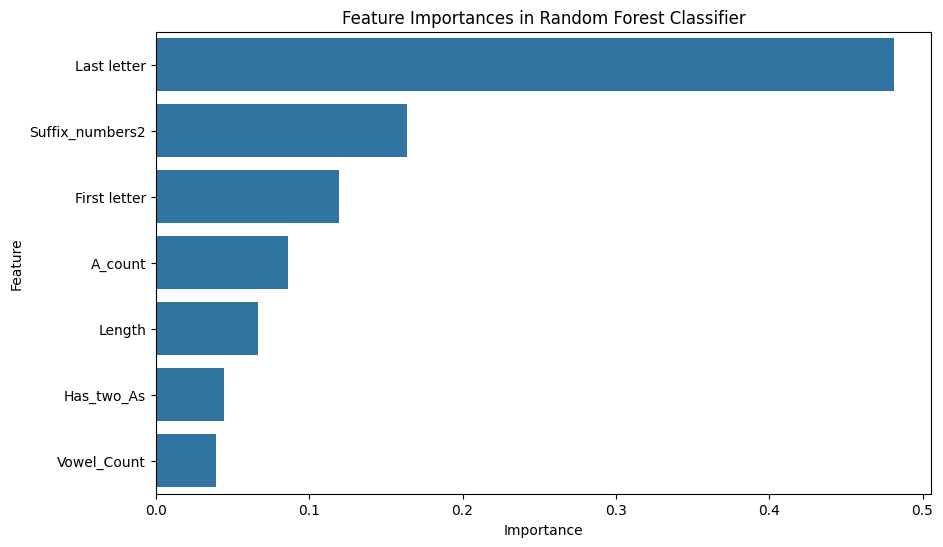

In [497]:
# Get feature importances
importances = clasificacion.feature_importances_
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

We noticed that we improve model precision by removing the vowel. (Past graph) Hence we considered them an irrelevant feature and decided to remove it in order to improve tye model ass well as for the Has_two_as

In [498]:
display(total)

# Convert categorical variables to numeric (One-Hot Encoding)
x = pd.get_dummies(total.drop(['Gender','Vowel_Count','Has_two_As'], axis=1))


# Target variable
y = total['Gender'].astype(int)

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clasificacion = RandomForestClassifier(random_state=42)
clasificacion.fit(x_train, y_train)

# Make predictions
y_prediccion = clasificacion.predict(x_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
performance = accuracy_score(y_test, y_prediccion)
print(f'Model precision: {performance:.2f}')


,Gender,First letter,Last letter,Length,Suffix_numbers2,Vowel_Count,A_count,Has_two_As
0,1,69,90,6,8490,3,1,False
1,1,72,79,7,7379,4,1,False
2,1,80,79,5,7679,2,1,False
3,1,69,73,4,7273,2,0,False
4,1,65,79,7,6879,3,2,True
...,...,...,...,...,...,...,...,...
6995,0,79,65,5,8265,3,2,True
6996,0,69,65,6,7365,4,2,True
6997,0,65,65,3,7865,2,2,True
6998,0,77,65,5,7365,3,2,True


Model precision: 0.93



TUNING OF HYPERPARAMETERS

We tried to vary some hypermarameters to see if the model prediction can be upgrated 

    1  Trying different combinations of hyperparameters (number of trees, maximum tree depth, etc.).
	2.	Using cross-validation to evaluate the model’s performance for each combination of hyperparameters.
	3.	Selecting the best combination of hyperparameters based on the cross-validation results.
	4.	Training the final model using the best hyperparameters on the full training data.
	5.	Evaluating the performance of the optimized model on the test data.





In [499]:
# Necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],         # Number of trees
    'max_depth': [10, 20],              # Maximum depth of the tree
    'min_samples_split': [2, 5],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],         # Minimum number of samples required in a leaf
    'bootstrap': [True, False]          # Whether to use bootstrap sampling or not
}

# Create the model
classifier = RandomForestClassifier(random_state=42)

# Configure Grid Search
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model with the training set
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Predict using the best parameters
y_prediction = grid_search.best_estimator_.predict(x_test)

# Evaluate model performance
performance = accuracy_score(y_test, y_prediction)
print(f'Model precision after tuning (Grid Search): {performance:.2f}');import joblib;best_model = grid_search.best_estimator_;joblib.dump(best_model, 'model_trained.pkl')






Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[C

['model_trained.pkl']

CROSS VALIDATION 

We apply the technique of ccross validation

Thos method train and test the model multiple times on different subsets of the data, providinf a better estiate on the theorical

In [500]:
# Necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Create the model
classifier = RandomForestClassifier(random_state=42)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(classifier, x, y, cv=5)

# Print the individual fold scores
print("Cross-validation scores for each fold: ", cv_scores)

# Print the average accuracy across all folds
print(f'Average model precision after cross-validation: {cv_scores.mean():.2f}')

Cross-validation scores for each fold:  [0.91714286 0.91428571 0.92142857 0.93       0.92      ]
Average model precision after cross-validation: 0.92


## CONCLUSION


In this analysis, we used several machine learning techniques to predict the gender of names based on extracted features such as name length, suffixes, and vowel counts. The final results show consistent and accurate performance across multiple models, with the following outcomes:

- **Random Forest**: 0.92 accuracy.
- **Logistic Regression**: 0.84 accuracy.
- **SVM**: 0.49 accuracy, indicating poor performance compared to other models.
- **Decision Tree**: 0.91 accuracy.
- **Gradient Boosting**: 0.91 accuracy.
- **KNN**: 0.90 accuracy.

After tuning and improving the **Random Forest** model through hyperparameter optimization, we increased its accuracy to **0.93**, making it the most effective model for this dataset. Additionally, cross-validation with **5 folds** revealed an average accuracy of **0.92**, indicating that the model is robust and generalizes well to new data.

In conclusion, the optimized and validated **Random Forest** model is the most suitable for this task, achieving an excellent balance of accuracy and consistency in predicting gender based on name features.
The next part is to do the test with the data set provided

In [501]:
test=pd.read_csv('test_dataset.csv');test['First Name'] = test['Name'].str.split().str[0];test['First letter'] = test['First Name'].str[0].apply(lambda x: ord(x));test['Last letter'] = test['First Name'].str[-1].apply(lambda x: ord(x));test['Suffix_numbers'] = test['First Name'].str[-2].apply(lambda x: ord(x));test['Suffix_numbers_str'] = test['Suffix_numbers'].astype(str);test['Last_letter_str'] = test['Last letter'].astype(str);test['Suffix_numbers2'] = test['Suffix_numbers_str'] + test['Last_letter_str'];test['Suffix_numbers2'] = test['Suffix_numbers2'].astype(int);test['Length'] = test['First Name'].apply(len);test['A_count'] = test['First Name'].str.upper().str.count('A');columns_to_drop = ['Suffix_numbers', 'Suffix_numbers_str', 'Last_letter_str', 'First Name'];test = test.drop(columns=columns_to_drop, axis=1);import joblib; import pandas as pd; from sklearn.metrics import accuracy_score; clasificacion=joblib.load('model_trained.pkl'); x_test=pd.get_dummies(test.drop(['Gender'], axis=1)).reindex(columns=clasificacion.feature_names_in_, fill_value=0); y_test=test['Gender'].astype(int); y_prediccion=clasificacion.predict(x_test); performance=accuracy_score(y_test, y_prediccion); print(f'Model precision on test dataset: {performance:.2f}'); display(test)


Model precision on test dataset: 0.94


,Name,Gender,First letter,Last letter,Suffix_numbers2,Length,A_count
0,CRISTIAN FERNANDO,1,67,78,6578,8,1
1,BARTOLOME,1,66,69,7769,9,1
2,ALVARO ANTONIO,1,65,79,8279,6,2
3,MANUEL LUIS,1,77,76,6976,6,1
4,MIGUEL DANIEL,1,77,76,6976,6,0
...,...,...,...,...,...,...,...
295,PABLO ALBERTO,1,80,79,7679,5,1
296,TERESITA,0,84,65,8465,8,1
297,ASCENSION,1,65,78,7978,9,1
298,MARIA VICENTA,0,77,65,7365,5,2
